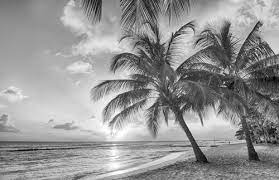

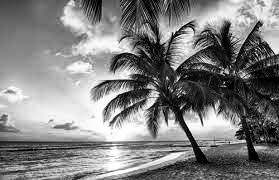

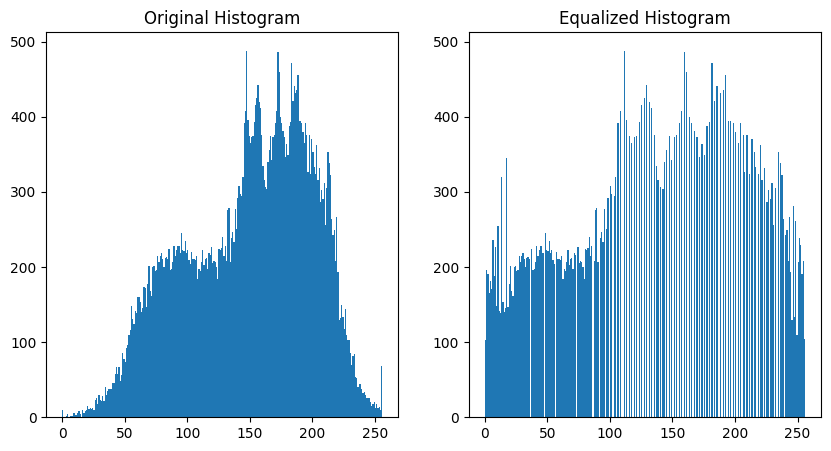

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# Load the grayscale image
image = cv2.imread('/content/nature.jpeg', cv2.IMREAD_GRAYSCALE)
# Apply Histogram Equalization using OpenCV
equalized_image = cv2.equalizeHist(image)
# Display the original and equalized images
cv2_imshow(image)
cv2_imshow(equalized_image)

# Plot the histograms
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), 256, [0,256])
plt.title('Original Histogram')
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), 256, [0,256])
plt.title('Equalized Histogram')
plt.show()



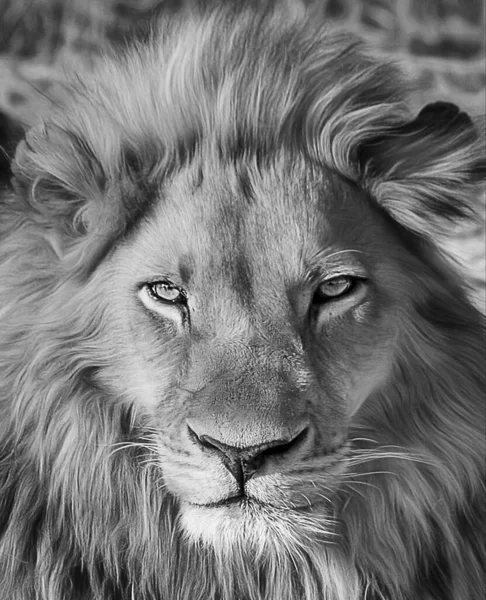

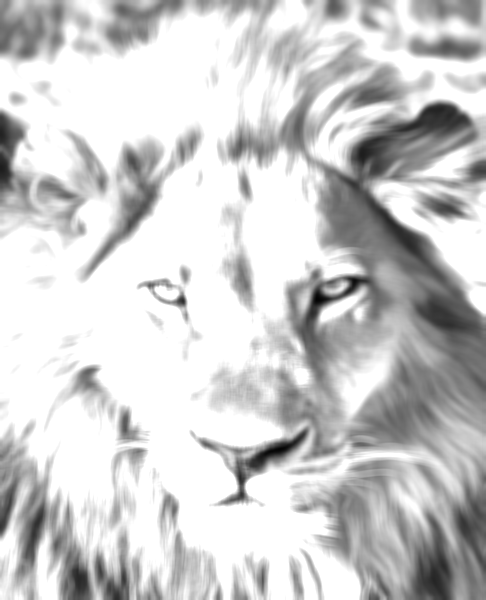

In [6]:

img = cv2.imread('/content/lion.jpg',cv2.IMREAD_GRAYSCALE)
kernel = np.ones((7,7),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
noisy_image = add_gaussian_noise(image, mean=0, var=0.01)

# Remove noise using Gaussian Blur
denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

cv2_imshow(img)
cv2_imshow(dst)


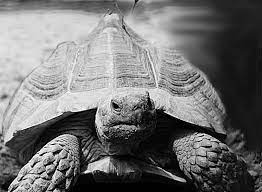

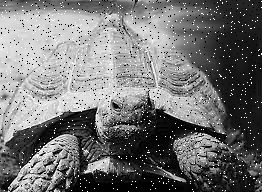

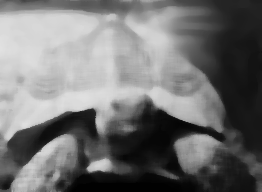

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/tot.jpeg', cv2.IMREAD_GRAYSCALE)
noisy_image = image.copy()
row, col = image.shape
prob=0.05
# Number of salt and pepper pixels
num_salt = int(prob * row * col * 0.5)
num_pepper = int(prob * row * col * 0.5)

# Add salt noise (white pixels)
salt_coords = [np.random.randint(0, i, num_salt) for i in image.shape]
noisy_image[salt_coords[0], salt_coords[1]] = 255

# Add pepper noise (black pixels)
pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
noisy_image[pepper_coords[0], pepper_coords[1]] = 0

# Function to remove noise using Median Filter
denoised_image = cv2.medianBlur(noisy_image, 9)

# Display the results
cv2_imshow(image)
cv2_imshow(noisy_image)
cv2_imshow(denoised_image)




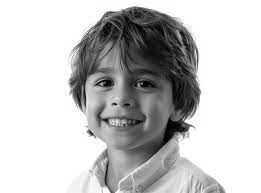

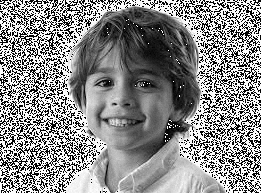

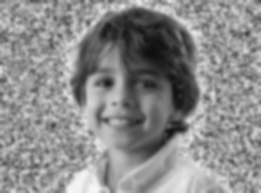

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, var=0.01):
    row, col = image.shape
    sigma = var ** 0.9
    gaussian = np.random.normal(mean, sigma, (row, col)) * 255
    noisy_image = image + gaussian.astype(np.uint8)
    noisy_image = np.clip(noisy_image, 0, 255)  # Ensure pixel values remain valid
    return noisy_image.astype(np.uint8)

# Load grayscale image
image = cv2.imread('/content/boy.jpeg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noisy_image = add_gaussian_noise(image, mean=0, var=0.01)

# Remove noise using Gaussian Blur
denoised_image = cv2.GaussianBlur(noisy_image, (9, 9), 0)

# Display the results
cv2_imshow(image)
cv2_imshow(noisy_image)
cv2_imshow(denoised_image)



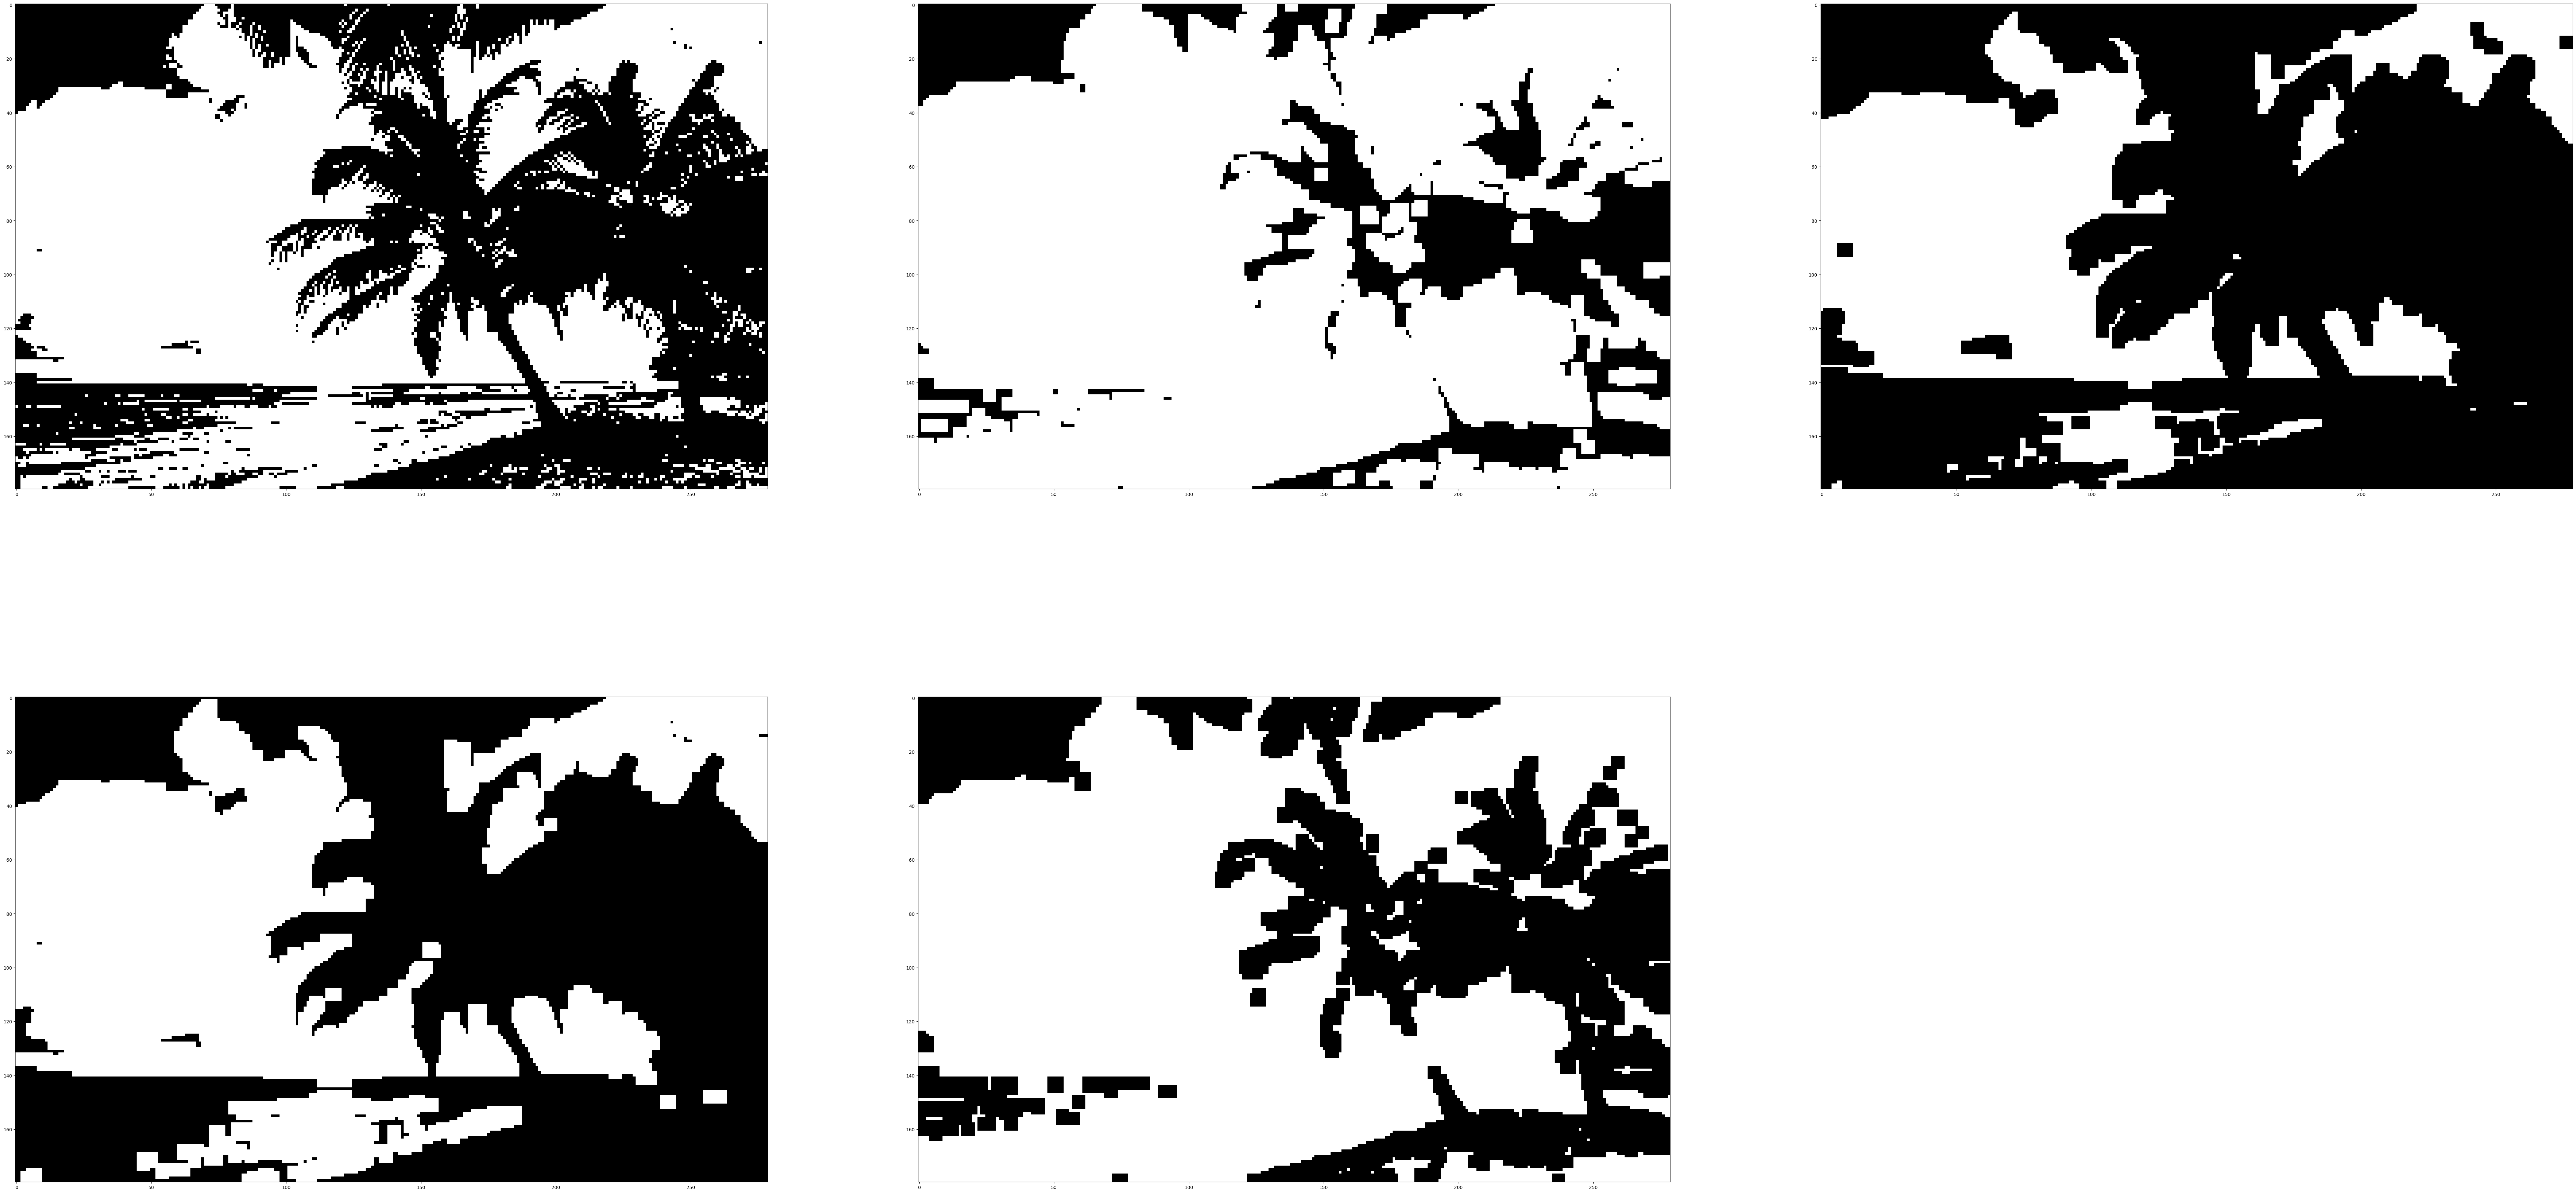

In [39]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the binary image
image = cv2.imread('/content/nature.jpeg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Opening (Erosion followed by Dilation)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Closing (Dilation followed by Erosion)
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(100,50))
plt.subplot(2,3,1)
plt.imshow(binary_image,cmap='gray')
plt.subplot(2,3,2)
plt.imshow(dilated_image,cmap='gray')
plt.subplot(2,3,3)
plt.imshow(eroded_image,cmap='gray')
plt.subplot(2,3,4)
plt.imshow(opened_image,cmap='gray')
plt.subplot(2,3,5)
plt.imshow(closed_image,cmap='gray')
plt.show()



